dataviz.ipynb

author: Philip Fowler
11 April 2025

This is the module 7 notebook for the data viz course at NW Missouri State University

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy.stats import norm, skew, boxcox
from scipy import stats, sparse
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import kagglehub

dont_panic = 42


In [3]:
# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /home/philip/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [4]:
# Load the dataset into a dataframe
file_path = f"{path}/insurance.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Null Values?
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [8]:
# drop the one duplicate row
df = df.drop_duplicates()
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows after dropping: 0


In [9]:
# what are the unique regions
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
# Only two values?
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
# Only two values?
df['smoker'].unique()


array(['yes', 'no'], dtype=object)

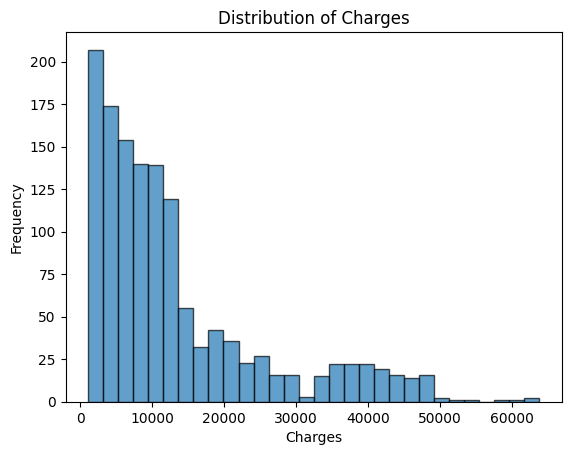

In [12]:
# Make a histogram for the target variable
plt.hist(df['charges'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

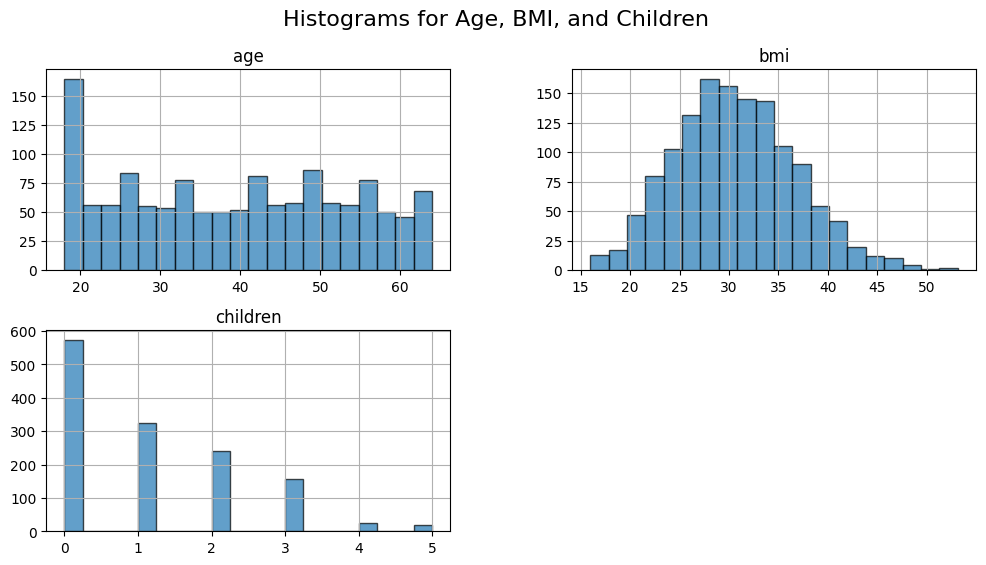

In [13]:
# Create histograms for age, bmi, and children
columns_to_plot = ['age', 'bmi', 'children']
df[columns_to_plot].hist(bins=20, figsize=(12, 6), edgecolor='k', alpha=0.7)

# Add a title to the plot
plt.suptitle('Histograms for Age, BMI, and Children', fontsize=16)
plt.show()

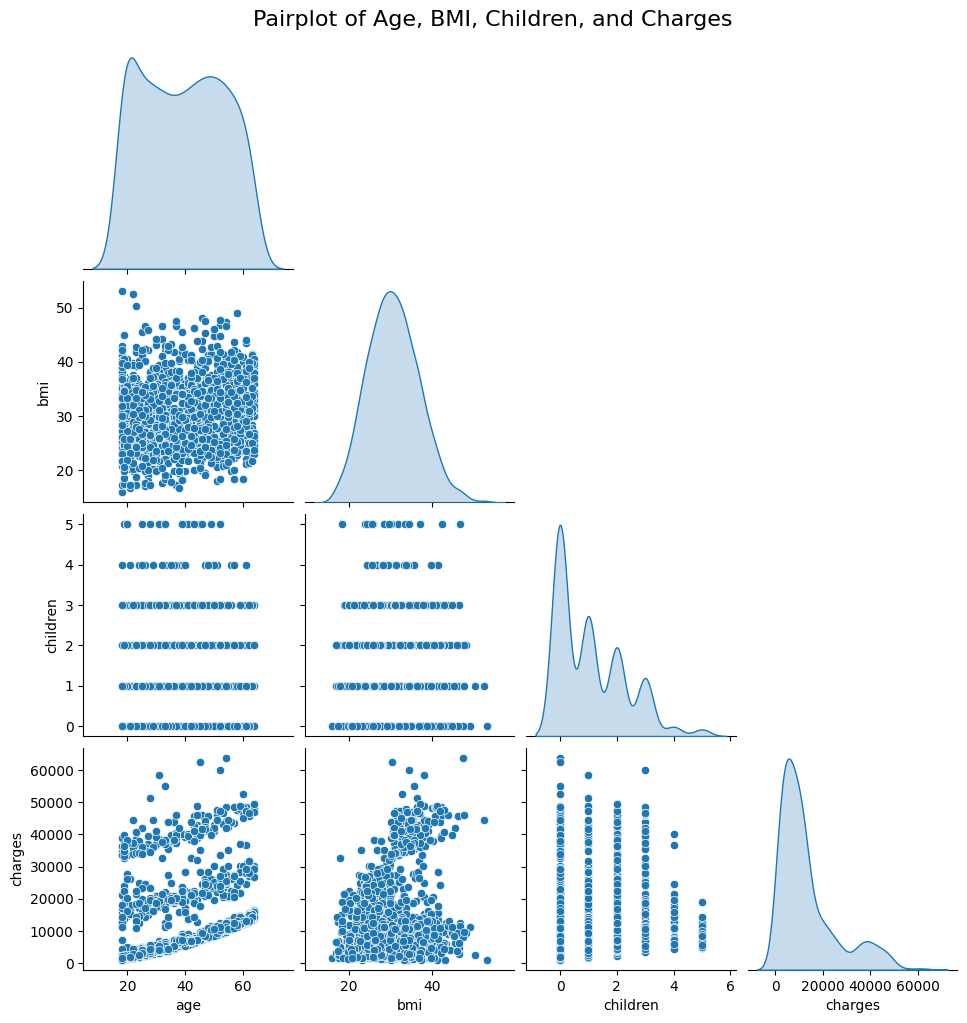

In [14]:
# Create a pairplot for the selected columns
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

In [17]:
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create the bmi_cat column
df['bmi_cat'] = df['bmi'].apply(categorize_bmi)

# Display the first few rows to verify
df[['bmi', 'bmi_cat']].head()

,bmi,bmi_cat
0,27.900,Overweight
1,33.770,Obese
2,33.000,Obese
3,22.705,Normal
4,28.880,Overweight


In [18]:
# Define age categories
def categorize_age(age):
    if age < 30:
        return 'young_adult'
    elif 30 <= age <= 62:
        return 'adult'
    else:
        return 'pensioner'

# Apply the function to create the age_cat column
df['age_cat'] = df['age'].apply(categorize_age)

# Display the first few rows to verify
df[['age', 'age_cat']].head()

,age,age_cat
0,19,young_adult
1,18,young_adult
2,28,young_adult
3,33,adult
4,32,adult


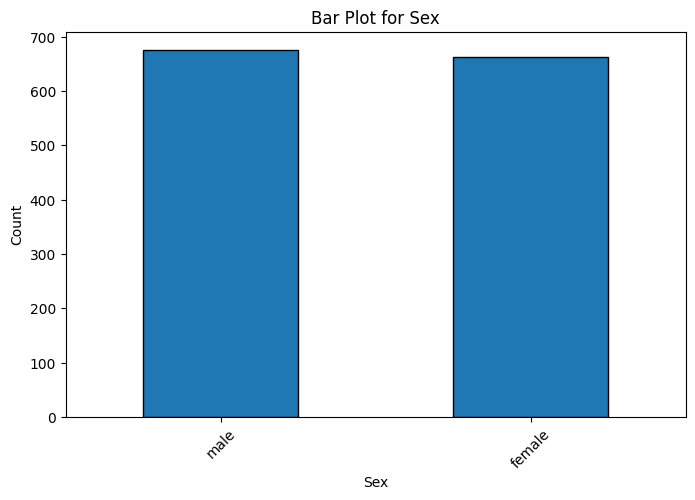

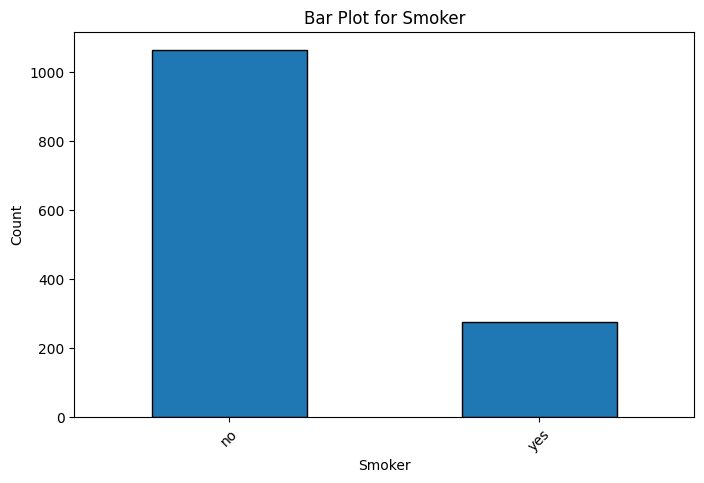

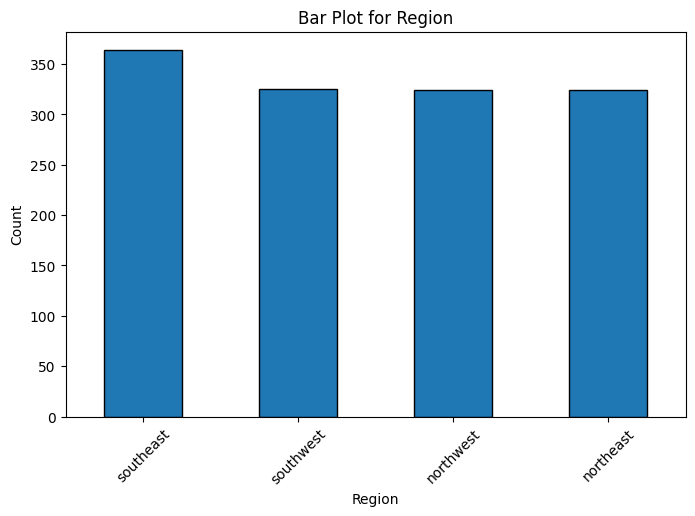

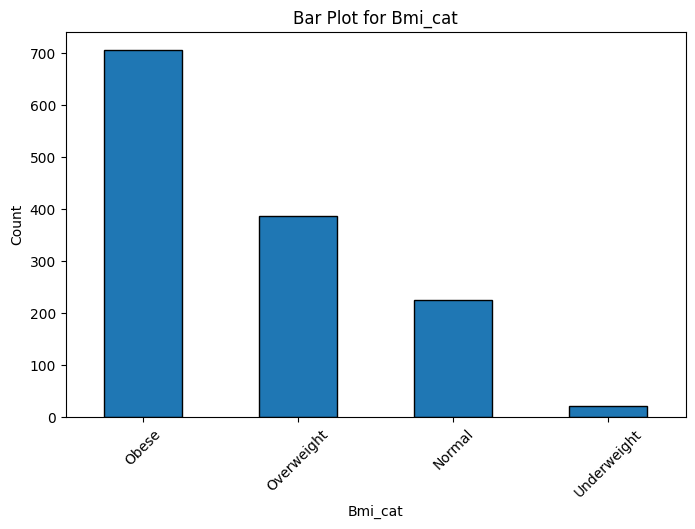

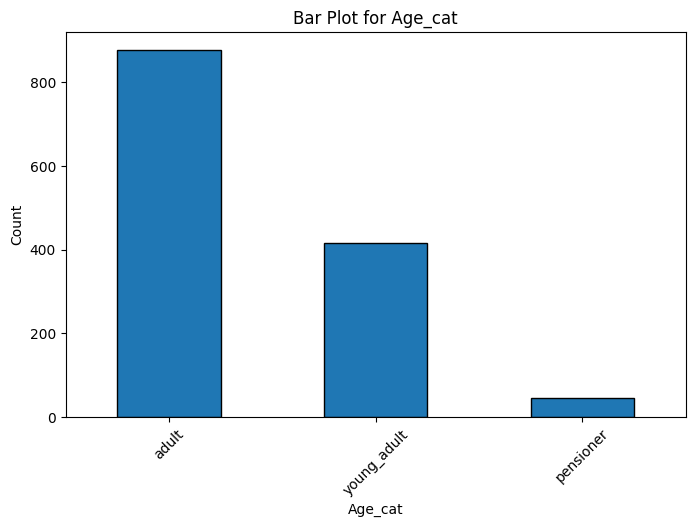

In [52]:
# Create bar plots for categorical variables
categorical_columns = ['sex', 'smoker', 'region', 'bmi_cat', 'age_cat']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Bar Plot for {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

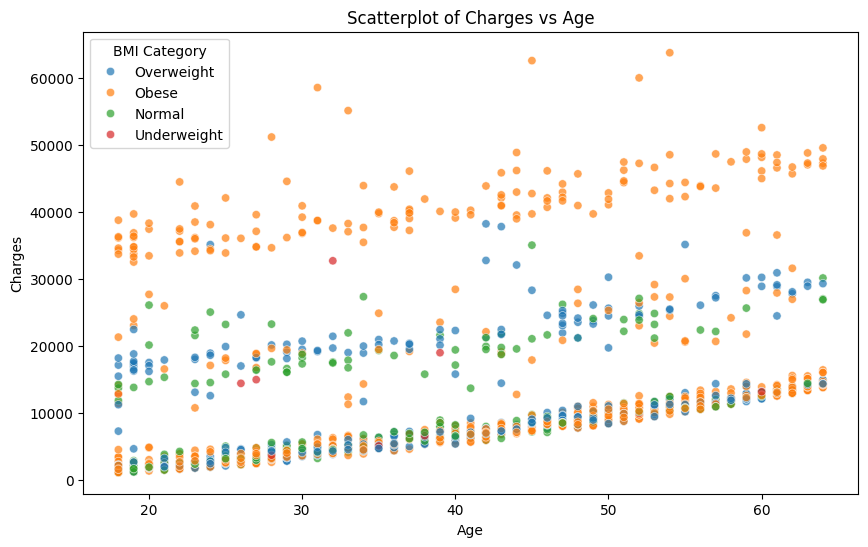

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='bmi_cat', alpha=0.7)
plt.title('Scatterplot of Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='BMI Category')
plt.show()

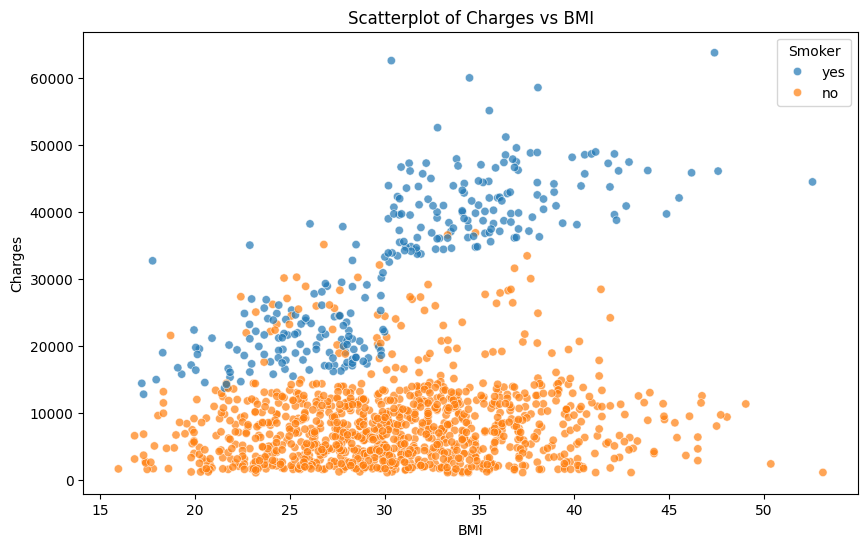

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('Scatterplot of Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

I find this plot to be one of the most intruiging of this dataset.  To my mind there are at least two visible groups here.  In the above imagethe smokers are certainly a separate group.  However, what is happening at 30 BMI that also increases the cost?  This is also the cutoff between overweight and obese, which makes me think that there is more to this than just two groups.  It is beginning to become apparent that obesity and smoking are two key factors in increasing medical costs.

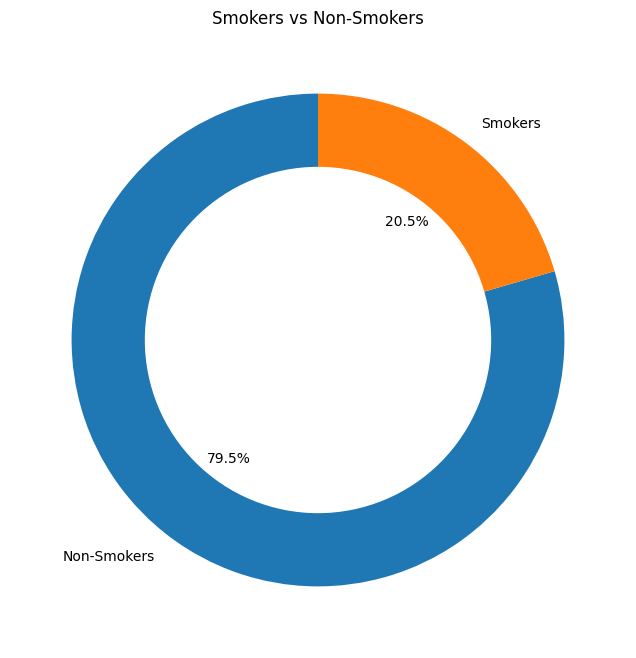

In [ ]:
# Count the number of smokers and non-smokers
smoker_counts = df['smoker'].value_counts()

# Create a donut chart with updated labels
plt.figure(figsize=(8, 8))
plt.pie(smoker_counts, labels=['Non-Smokers', 'Smokers'], autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))  
plt.title('Smokers vs Non-Smokers')
plt.show()

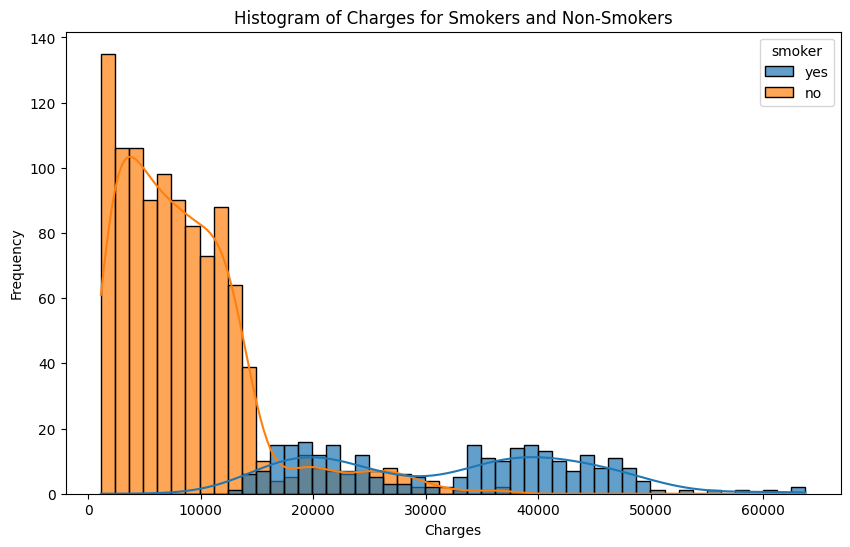

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', bins=50, kde=True, alpha=0.7)
plt.title('Histogram of Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

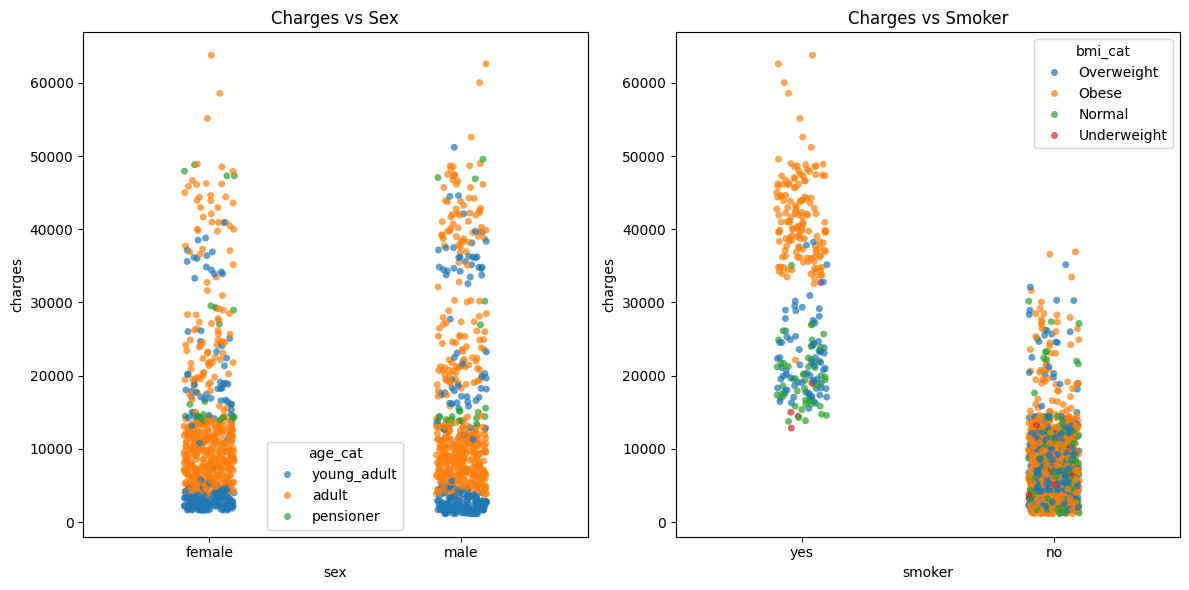

In [23]:
# Strip plot for charges vs sex
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.stripplot(data=df, x='sex', y='charges', jitter=True, hue='age_cat', alpha=0.7)
plt.title('Charges vs Sex')

# Strip plot for charges vs smoker
plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='smoker', y='charges', jitter=True, hue='bmi_cat' ,alpha=0.7)
plt.title('Charges vs Smoker')

plt.tight_layout()
plt.show()

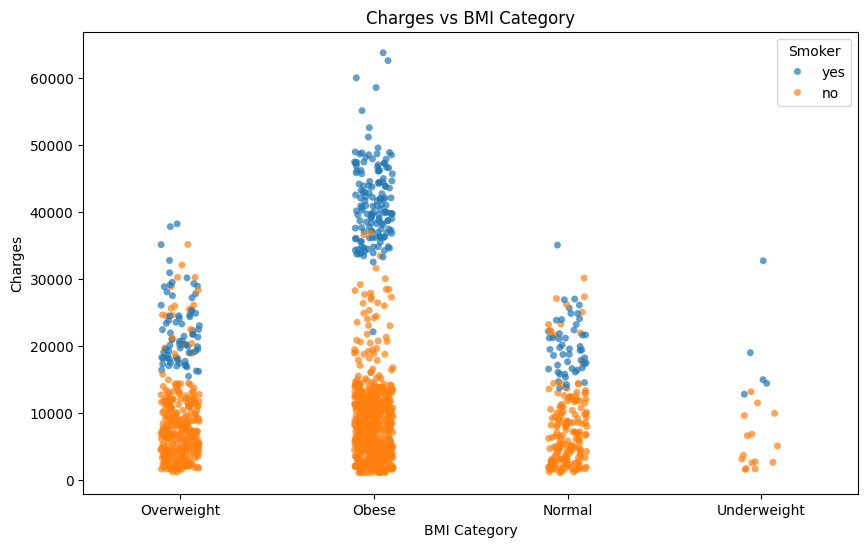

In [24]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='bmi_cat', y='charges', hue='smoker', jitter=True, alpha=0.7)
plt.title('Charges vs BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

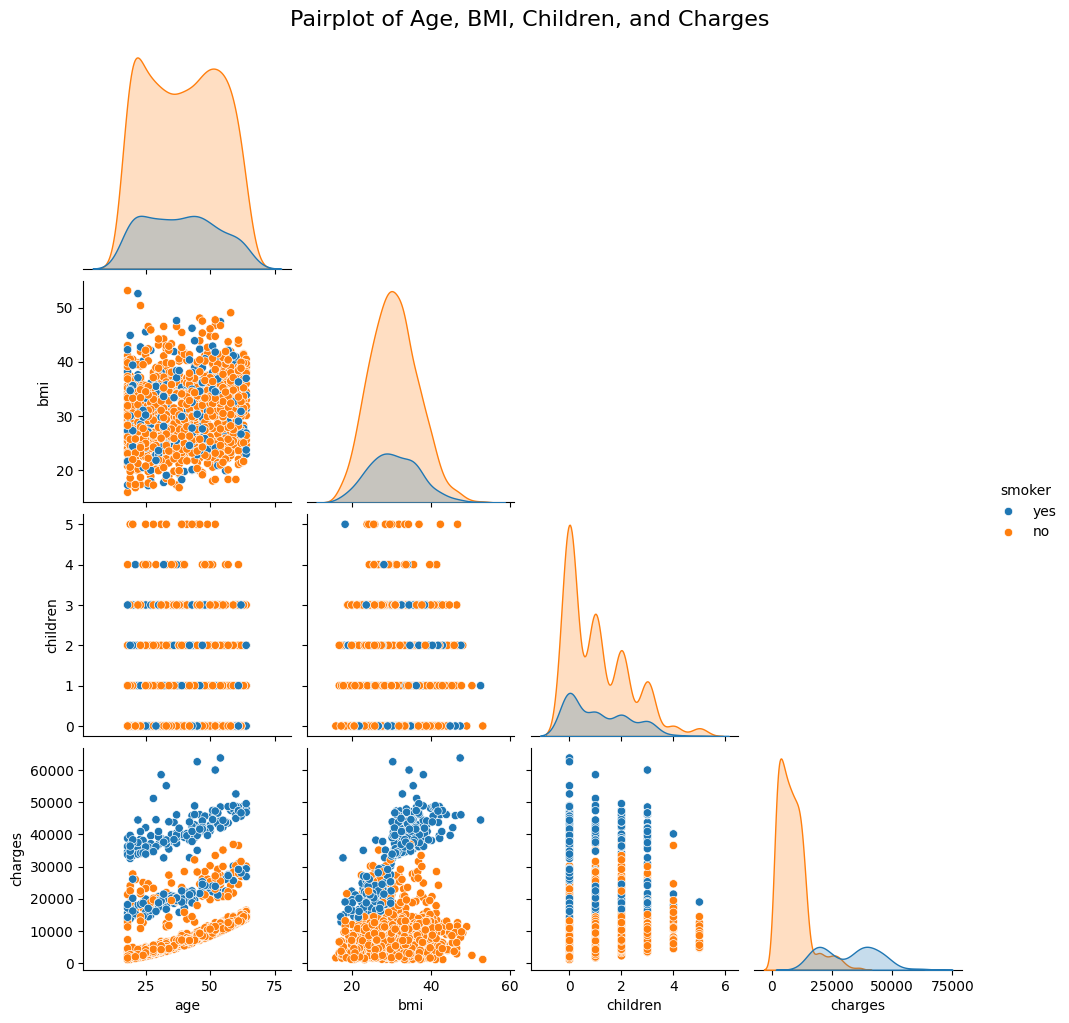

In [25]:
# Create a pairplot for the selected columns
sns.pairplot(df, hue='smoker', diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

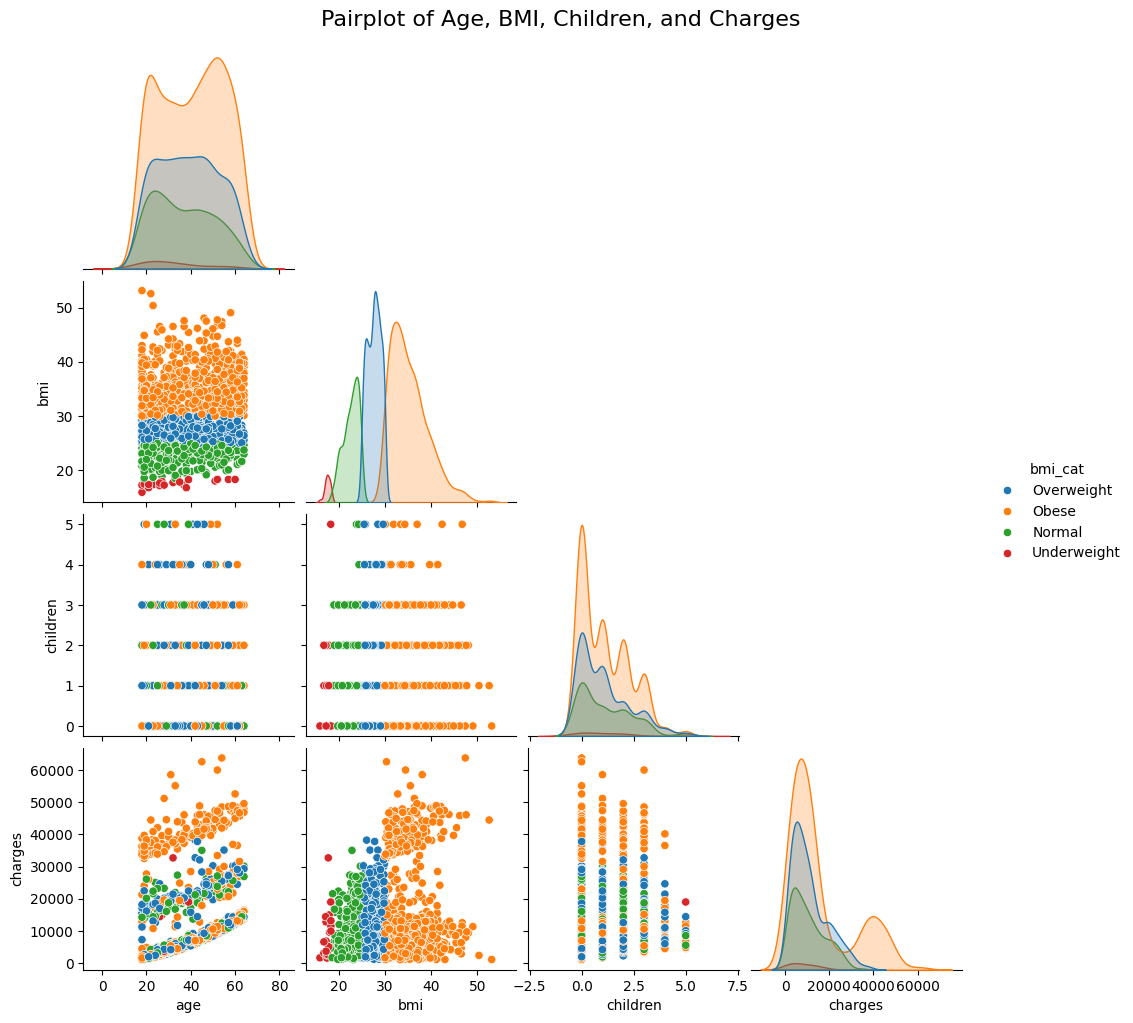

In [26]:
# Create a pairplot for the selected columns
sns.pairplot(df, hue='bmi_cat', diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

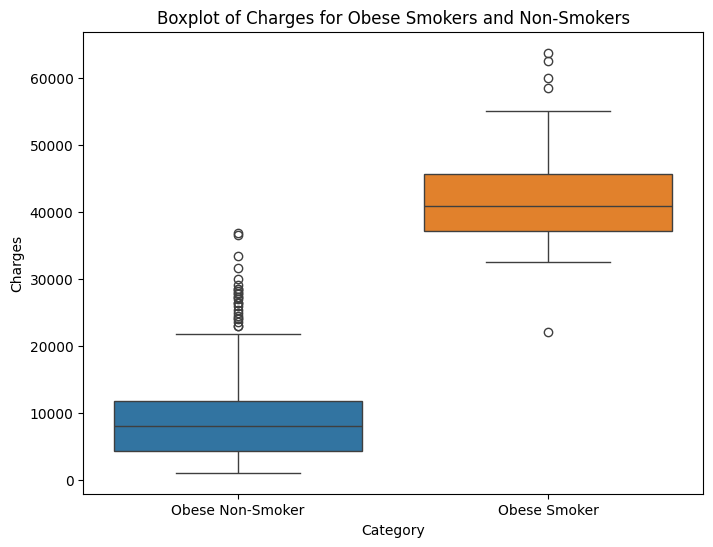

In [ ]:
# Filter the dataframe for obese individuals
obese_df = df[df['bmi_cat'] == 'Obese'].copy()  

# Create a new column to categorize obese individuals as smokers or non-smokers
obese_df.loc[:, 'smoker_status'] = obese_df['smoker'].apply(lambda x: 'Obese Smoker' if x == 'yes' else 'Obese Non-Smoker')

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=obese_df, x='smoker_status', y='charges', hue='smoker', dodge=False, legend=False)
plt.title('Boxplot of Charges for Obese Smokers and Non-Smokers')
plt.xlabel('Category')
plt.ylabel('Charges')
plt.savefig('images/obese_smoker_boxplot.png')

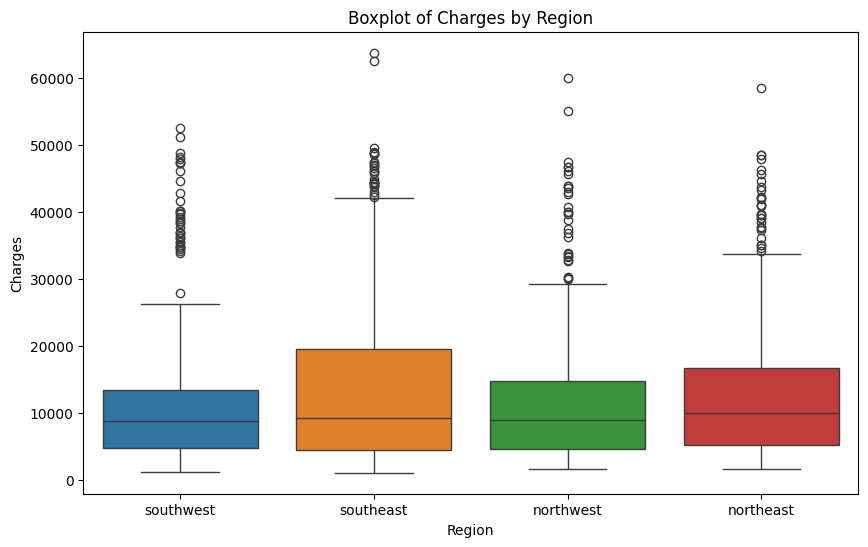

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='region', dodge=False, legend=False)
plt.title('Boxplot of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

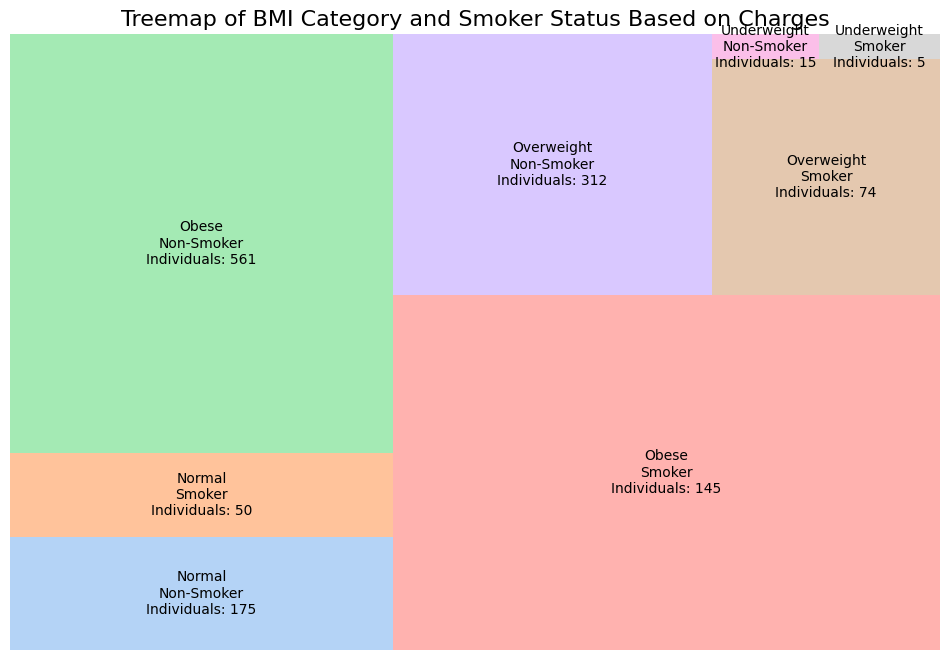

In [50]:
import squarify

# Prepare data for the treemap
sizes = treemap_data['charges']
labels = treemap_data['label']
colors = sns.color_palette('pastel', len(sizes))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.axis('off')
plt.title('Treemap of BMI Category and Smoker Status Based on Charges', fontsize=16)
plt.show()